<a href="https://colab.research.google.com/github/karthickraja0809/jarvisAI/blob/main/linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('output.csv')

# Check for missing values
print(data.isnull().sum())

# Handle date columns separately (example: convert to numerical features)
# Assuming 'date' is the column with date-time strings
data['date'] = pd.to_datetime(data['date'])  # Convert to datetime objects
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data = data.drop('date', axis=1)  # Remove the original date column

# Drop or fill missing values for numerical columns (example: filling with median)
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Encode categorical variables (example: using one-hot encoding)
data = pd.get_dummies(data, drop_first=True)

# Define independent (X) and dependent (y) variables
X = data.drop('price', axis=1)  # Assuming 'price' is the column to predict
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for regularization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [38]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        self.bias = 0
        self.X = X
        self.y = y

        for _ in range(self.iterations):
            self.update_weights()

    def update_weights(self):
        y_pred = self.predict(self.X)
        d_theta = -(2 * (self.X.T).dot(self.y - y_pred)) / self.m
        d_bias = -2 * np.sum(self.y - y_pred) / self.m

        self.theta -= self.learning_rate * d_theta
        self.bias -= self.learning_rate * d_bias

    def predict(self, X):
        return X.dot(self.theta) + self.bias


In [39]:
class LinearRegressionWithRegularization(LinearRegression):
    def __init__(self, learning_rate=0.01, iterations=1000, l1=0.0, l2=0.0):
        super().__init__(learning_rate, iterations)
        self.l1 = l1  # L1 regularization coefficient
        self.l2 = l2  # L2 regularization coefficient

    def update_weights(self):
        y_pred = self.predict(self.X)
        d_theta = -(2 * (self.X.T).dot(self.y - y_pred)) / self.m + self.l1 * np.sign(self.theta) + self.l2 * self.theta
        d_bias = -2 * np.sum(self.y - y_pred) / self.m

        self.theta -= self.learning_rate * d_theta
        self.bias -= self.learning_rate * d_bias


In [40]:
class LinearRegressionWithRegularization(LinearRegression):
    def __init__(self, learning_rate=0.01, iterations=1000, l1=0.0, l2=0.0):
        super().__init__(learning_rate, iterations)
        self.l1 = l1  # L1 regularization coefficient
        self.l2 = l2  # L2 regularization coefficient

    def update_weights(self):
        y_pred = self.predict(self.X)
        d_theta = -(2 * (self.X.T).dot(self.y - y_pred)) / self.m + self.l1 * np.sign(self.theta) + self.l2 * self.theta
        d_bias = -2 * np.sum(self.y - y_pred) / self.m

        self.theta -= self.learning_rate * d_theta
        self.bias -= self.learning_rate * d_bias


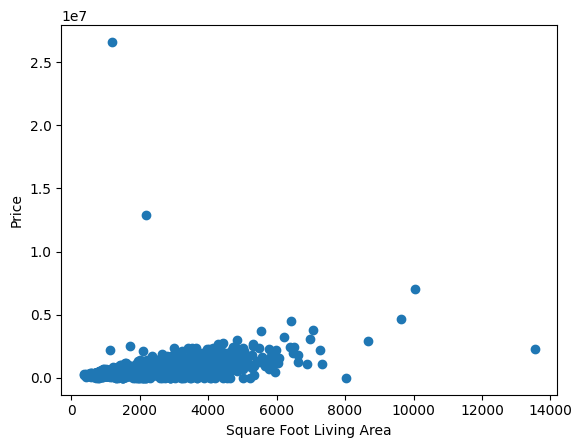

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0       3.0       1.50         1340      7912     1.5           0   
1  2384000.0       5.0       2.50         3650      9050     2.0           0   
2   342000.0       3.0       2.00         1930     11947     1.0           0   
3   420000.0       3.0       2.25         2000      8030     1.0           0   
4   550000.0       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  ...  statezip_WA 98166  statezip_WA 98168  \
0     0          3        1340  ...              False              False   
1     4          5        3370  ...              False              False   
2     0          4        1930  ...              False              False   
3     0          4        1000  ...              False              False   
4     0          4        1140  ...              False              False   

   statezip_WA 98177  statezip_WA 98178  statezip_WA 981

In [43]:
# Visualize some features against the target
plt.scatter(data['sqft_living'], data['price'])
plt.xlabel('Square Foot Living Area')
plt.ylabel('Price')
plt.show()

# Matrix operations
X_matrix = np.dot(X_train.T, X_train)
y_vector = np.dot(X_train.T, y_train)
#theta_optimal = np.linalg.solve(X_matrix, y_vector)

#print('Optimal theta:', theta_optimal)

# Data manipulation with Pandas
data['price_per_sqft'] = data['price'] / data['sqft_living']
print(data.head())


In [46]:

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Instantiate the model
model = LinearRegressionWithRegularization(learning_rate=0.01, iterations=1000, l1=0.1, l2=0.1)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate RMSE by taking square root of MSE
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MSE: 962066033802.321
RMSE: 980849.6489280715
R²: 0.05665589414156946
